In [1]:
# 从SVM的推导过程可以看出，SVM的十分关注与特征的归一化、对异常值敏感、同时容易发生间隔冲突

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [7]:

## 线性可分的情况

iris=datasets.load_iris()
X=iris['data'][:,(2,3)]
y=(iris['target']==2).astype(np.float64)
svm_clf=Pipeline([
   ('scaler',StandardScaler()),
   ('linear_svc',LinearSVC(C=1,loss='hinge'))
])
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [37]:
svm_clf.predict([[0,0]])

array([0.])

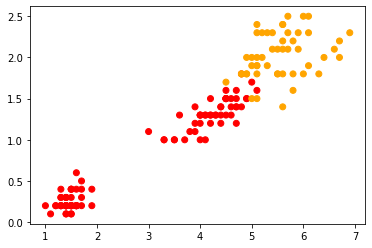

In [39]:
import matplotlib.pyplot as plt
colors = ['#FF0000', '#FFA500']
c= [colors[int(ys)] for ys in y]
plt.scatter(X[:,0],X[:,1],c=c)

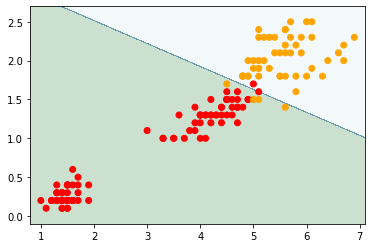

In [41]:
h=0.002
x_min, x_max = X[:,0].min() - 0.2, X[:,0].max() + 0.2
y_min, y_max = X[:,1].min() - 0.2, X[:,1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),np.arange(y_min, y_max,h))
Z=svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=c)

In [46]:
def svm_visual(x,y,svm_clf,labels):
    h=0.002
    x_min, x_max = x.min() - 0.2, x.max() + 0.2
    y_min, y_max = y.min() - 0.2, y.max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max,h),np.arange(y_min, y_max,h))
    Z=svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.2)
    colors = ['#FF0000', '#FFA500']
    c= [colors[int(label)] for label in labels]
    plt.scatter(x,y,c=c)

/Users/chenxia/miniforge3/envs/tf2/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


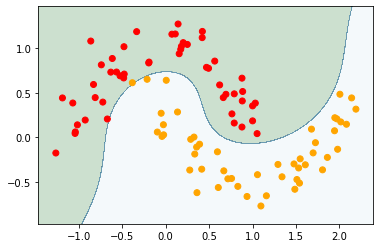

In [47]:
## 非线性情况--线性多项式
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y=make_moons(n_samples=100,noise=0.15)
p_s_c=Pipeline([
    ('poly_features',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
])
p_s_c.fit(X,y)
svm_visual(X[:,0],X[:,1],p_s_c,y)

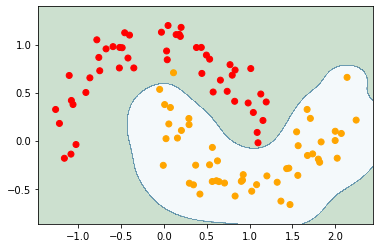

In [50]:
## 非线性情况--RBF内核
## 非线性情况--线性多项式
from sklearn.datasets import make_moons
from sklearn.svm import SVC

X,y=make_moons(n_samples=100,noise=0.15)
p_s_rbf=Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='rbf',gamma=5,C=0.001))
])
p_s_rbf.fit(X,y)
svm_visual(X[:,0],X[:,1],p_s_rbf,y)